In [1]:
import pandas as pd
import pandas_market_calendars as mcal
import datetime
from Tools.Trade_Functions import *
import numpy as np
import plotly.express as px


/Users/atulkrishnan/Desktop/TradingAlgos/Stock_Picker_Algo


In [2]:
def pick_trade(TradeData,RunDate,NumStocks,stopLoss=-0.01,holdTime=0,TimeInput=5,debug=False,numDaysToCheckStopLoss=5):
    #Calculate pct change
    
    PctChange = get_SortedPctChange(RunDate,TimeInput,debug=False)
    
    #select first N stocks and caculate percent retruns
    LongStockList = PctChange["Ticker"].iloc[:NumStocks]
    LongTradeInfo = getLongReturns(RunDate,LongStockList,stopLoss=stopLoss,holdTime=holdTime,debug=debug,numDaysToCheckStopLoss=5)
    #select bottom N stocks and caculate percent retruns
    ShortStockList = PctChange["Ticker"].iloc[len(PctChange["Ticker"])-NumStocks:]
    ShortTradeInfo = getShortReturns(RunDate,ShortStockList,stopLoss=stopLoss,holdTime=holdTime,debug=debug,numDaysToCheckStopLoss=5)
    TotalReturn = sum(LongTradeInfo["Returns"]) / NumStocks + sum(ShortTradeInfo["Returns"]) / NumStocks
    
    return TotalReturn, pd.concat([TradeData,LongTradeInfo,ShortTradeInfo])

In [3]:
framedCal= get_calendar()

In [8]:
TotalReturnList = list()
DateReturnList = list()
TimeInput = 4
NumStocks= 2
holdTime=2
#must be less than holdtime
numDaysToCheckStopLoss= holdTime
TradeData=pd.DataFrame()
cal=list()
for i in range(0,len(framedCal),holdTime+1):
    cal.append(framedCal[i])

#Anual Range
year=2024
yearlyDates = [date for date in cal if date.startswith(str(year))]
DateRange = [yearlyDates[0], yearlyDates[-1]]

#Set custome Range
#DateRange=['2015-01-05','2024-11-07']
#DateRange = [cal[51], cal[-1]]


DateRange=[cal.index(DateRange[0]),cal.index(DateRange[1])]
for day in cal[DateRange[0]:DateRange[1]]:
    dailyReturn,TradeData = pick_trade(TradeData,RunDate=day,NumStocks=NumStocks,stopLoss=-0.02,TimeInput=TimeInput,holdTime=holdTime,debug=False,numDaysToCheckStopLoss=numDaysToCheckStopLoss)
    TotalReturnList.append(dailyReturn)
    
TradeData=TradeData.reset_index(drop=True)
returnDf = pd.DataFrame({'Date': pd.to_datetime(cal[DateRange[0]:DateRange[1]]),'Return':TotalReturnList})


M = 1
returnVal=[]
for i in returnDf["Return"]:
    M = M*(1+i)
    returnVal.append(M)
returnDf=pd.concat([returnDf,pd.DataFrame({"ReturnVals":returnVal})],axis=1)





In [9]:

fig = px.line(returnDf, x='Date', y='ReturnVals')

fig.update_layout(title='Returns Over Time',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [10]:
returnDf

,Date,Return,ReturnVals
0,2024-01-03,-0.013591,0.986409
1,2024-01-08,0.088305,1.073515
2,2024-01-11,-0.007380,1.065592
3,2024-01-17,-0.012155,1.052640
4,2024-01-22,-0.015137,1.036706
...,...,...,...
68,2024-10-24,-0.020052,1.049187
69,2024-10-29,-0.018511,1.029765
70,2024-11-01,0.033096,1.063847
71,2024-11-06,0.020875,1.086055


In [11]:
TradeData.head(30)

,Stock,Type,ExecutionDate,CloseDate,Returns,StopLoss
0,MRNA,Long,2024-01-03,2024-01-03,-0.020400,1
1,KHC,Long,2024-01-03,2024-01-05,-0.008375,0
2,ARM,Short,2024-01-03,2024-01-03,-0.020400,1
3,MDB,Short,2024-01-03,2024-01-05,0.021994,0
4,MRVL,Long,2024-01-08,2024-01-10,0.056768,0
5,SMCI,Long,2024-01-08,2024-01-10,0.160643,0
6,NXPI,Short,2024-01-08,2024-01-08,-0.020400,1
7,ON,Short,2024-01-08,2024-01-08,-0.020400,1
8,SMCI,Long,2024-01-11,2024-01-11,-0.020400,1
9,CRWD,Long,2024-01-11,2024-01-16,-0.020400,1


In [11]:

returnDf_2019 = returnDf[returnDf['Date'].dt.year == 2019]

# Ensure 'Return' is numeric
returnDf_2019['Return'] = returnDf_2019['Return'].astype(float)

In [12]:
np.prod(1 + returnDf_2019['Return'])

1.0

In [13]:
SharpeRatio = ( np.mean(returnDf["Return"]) * 252 - 0.05) / (np.std(returnDf["Return"]) * 252**0.5)

In [14]:
SharpeRatio

-8.313978505022462

In [15]:
print(np.mean(returnDf["Return"][returnDf["Return"]<0]))
len(returnDf["Return"][returnDf["Return"]<0])

-0.03562498811753077


26

In [16]:
print(np.mean(returnDf["Return"][returnDf["Return"]>0]))
len(returnDf["Return"][returnDf["Return"]>0])

0.026282768562674374


10

In [17]:
np.std(returnDf["Return"])*np.sqrt(252)

0.5645857798607229

In [18]:
#dfOut.to_csv("ReturnData.csv")


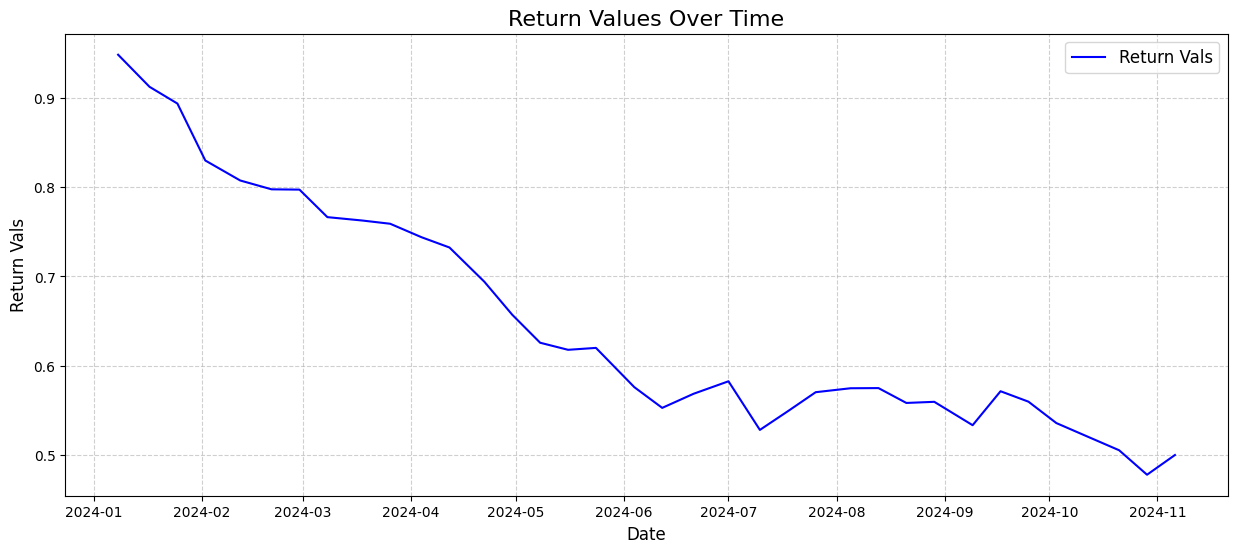

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))  # Set the figure size
plt.plot(returnDf['Date'], returnDf['ReturnVals'],  linestyle='-', color='blue', label="Return Vals")
plt.title("Return Values Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Return Vals", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.savefig("returns.png", dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()